In [136]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

import dateutil.parser
import datetime

In [137]:
def float_conversion(value_str):
    try:
        value=float(value_str.replace(",",""))
        return value
    except:
        pass

Database Entry Eurostat: Unemployment by sex and age - monthly average [une_rt_m]

Link Metadata: http://ec.europa.eu/eurostat/cache/metadata/en/une_esms.htm

"Unemployed persons are all persons 15 to 74 years of age (16 to 74 years in ES, IT and the UK)"

"The unemployment rate is the number of people unemployed as a percentage of the labour force. The labour force is the total number of people employed and unemployed. In the database, unemployment rates can be downloaded by chosing the unit "PC_ACT", Percentage of Active Population."

Selected:
- Indicator: Seasonally adjusted data (not calendar adjusted)
- Unit: Percentage of active population
- Time: since 2008-01

In [138]:
df=pd.read_csv("une_rt_m_1_Data-2017-06-12.csv")

In [139]:
df["Flag and Footnotes"].value_counts()

i    5
b    1
Name: Flag and Footnotes, dtype: int64

Available flags:
b	break in time series	
c	confidential	
d	definition differs, see metadata
e	estimated	
f	forecast	
i	see metadata (phased out)

In [140]:
df["Value_parsed"] = df["Value"].apply(float_conversion)

In [141]:
df.columns

Index(['TIME', 'GEO', 'S_ADJ', 'AGE', 'UNIT', 'SEX', 'Value',
       'Flag and Footnotes', 'Value_parsed'],
      dtype='object')

In [142]:
df=df[["TIME", "GEO", "Value_parsed"]]
df.columns=(["TIME", "GEO", "Unemployment_rate"])

In [ ]:
# Testing time conversion

In [120]:
dfger=df[df["GEO"]=="Germany (until 1990 former territory of the FRG)"]

In [132]:
dfger["parsed_time"]=[value.replace("M01", "-01-01").replace("M02", "-02-01").replace("M03", "-03-01").replace("M04", "-04-01").replace("M05", "-05-01").replace("M06", "-06-01").replace("M07", "-07-01").replace("M08", "-08-01").replace("M09", "-09-01").replace("M10", "-10-01").replace("M11", "-11-01").replace("M12", "-12-01") for value in dfger["TIME"]]

In [134]:
dfger["datetime"]=[dateutil.parser.parse(value) for value in dfger["parsed_time"]]

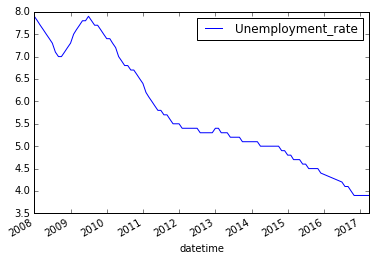

In [135]:
dfger.plot(x="datetime", y="Unemployment_rate")

In [143]:
df["parsed_time"]=[value.replace("M01", "-01-01").replace("M02", "-02-01").replace("M03", "-03-01").replace("M04", "-04-01").replace("M05", "-05-01").replace("M06", "-06-01").replace("M07", "-07-01").replace("M08", "-08-01").replace("M09", "-09-01").replace("M10", "-10-01").replace("M11", "-11-01").replace("M12", "-12-01") for value in df["TIME"]]
df["datetime"]=[dateutil.parser.parse(value) for value in df["parsed_time"]]

In [144]:
countries_list = []
for country in df["GEO"]:
    countries_list.append(country)

In [145]:
countries = set(countries_list)

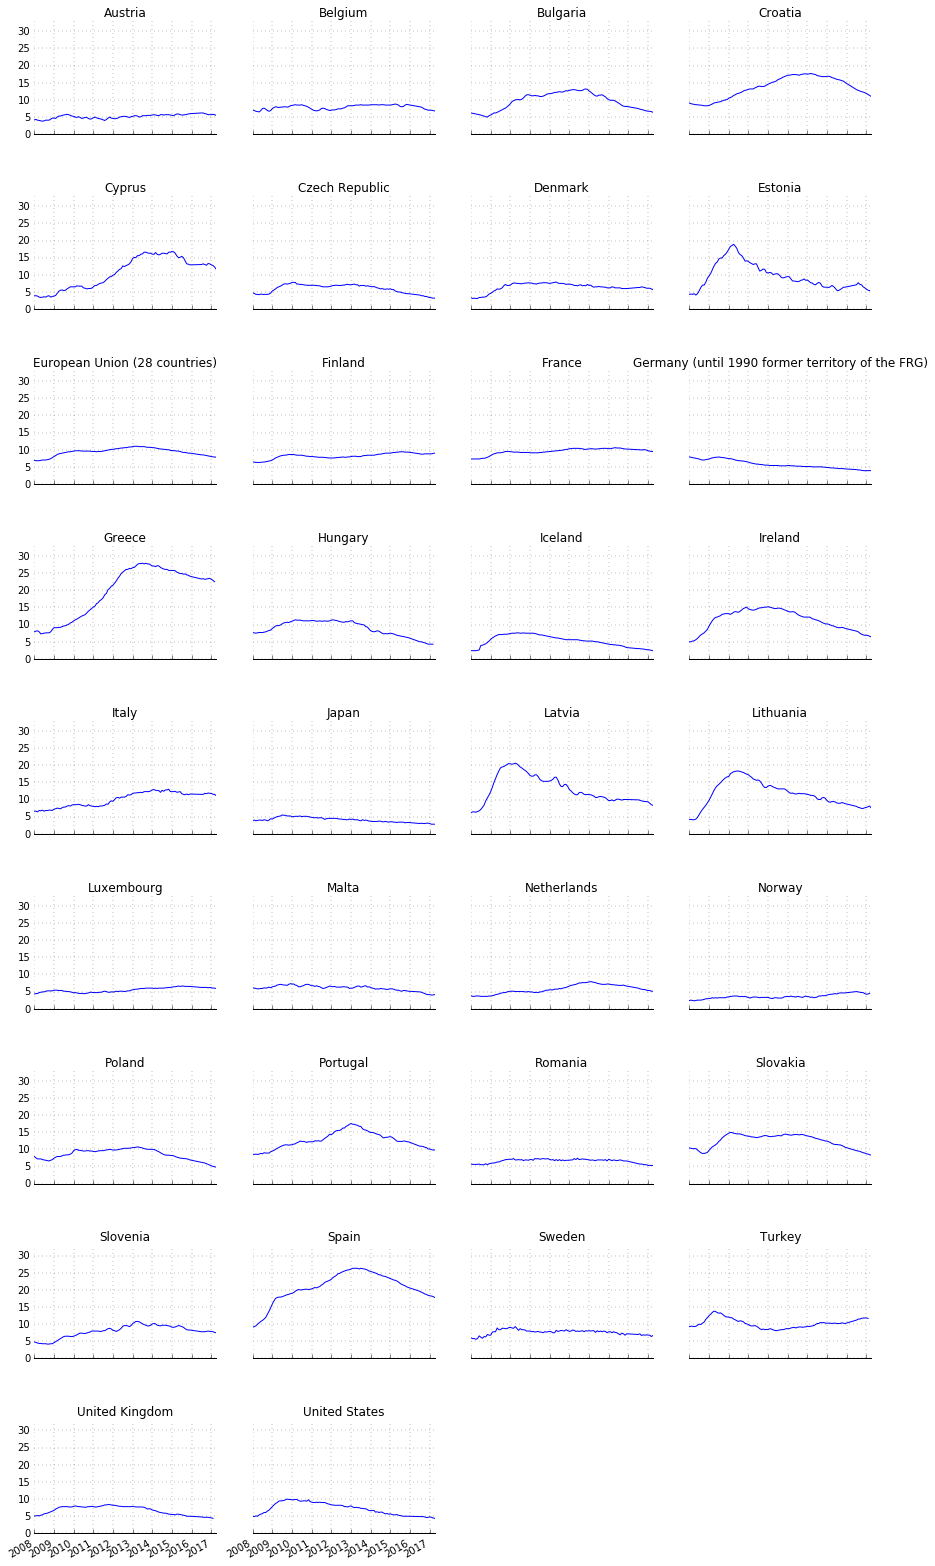

In [146]:
df=df.copy()
fig, axes = plt.subplots(nrows=9, ncols=4, sharex=True, sharey=True, figsize=(15,30))
axes_list = [item for sublist in axes for item in sublist]

subset_df = df[df['GEO'].isin(countries)]

for countryname, selection in subset_df.groupby('GEO'):
    ax = axes_list.pop(0)
    selection.plot(x='datetime', y='Unemployment_rate', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,max(df["Unemployment_rate"]+5))
    ax.tick_params(
        which='minor',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.tick_params(
        which='major',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("")

for ax in axes_list:
    ax.remove()

plt.subplots_adjust(hspace=0.55)

# plt.savefig("energy-multiples-prices-domestic.pdf", transparent = True)

In [126]:
df["Unemployment_rate"].max()

27.899999999999999

# Make small multiple, sort graphs by last value in descending order

In [158]:
sample_df = df
grouped = sample_df.groupby("GEO")['Unemployment_rate'].last().sort_values(ascending=False).index
grouped

Index(['Greece', 'Spain', 'Turkey', 'Cyprus', 'Italy', 'Croatia', 'Portugal',
       'France', 'Finland', 'Slovakia', 'Latvia',
       'European Union (28 countries)', 'Slovenia', 'Lithuania', 'Belgium',
       'Sweden', 'Bulgaria', 'Ireland', 'Luxembourg', 'Denmark', 'Austria',
       'Estonia', 'Romania', 'Netherlands', 'Poland', 'Norway',
       'United Kingdom', 'United States', 'Hungary', 'Malta',
       'Germany (until 1990 former territory of the FRG)', 'Czech Republic',
       'Japan', 'Iceland'],
      dtype='object', name='GEO')

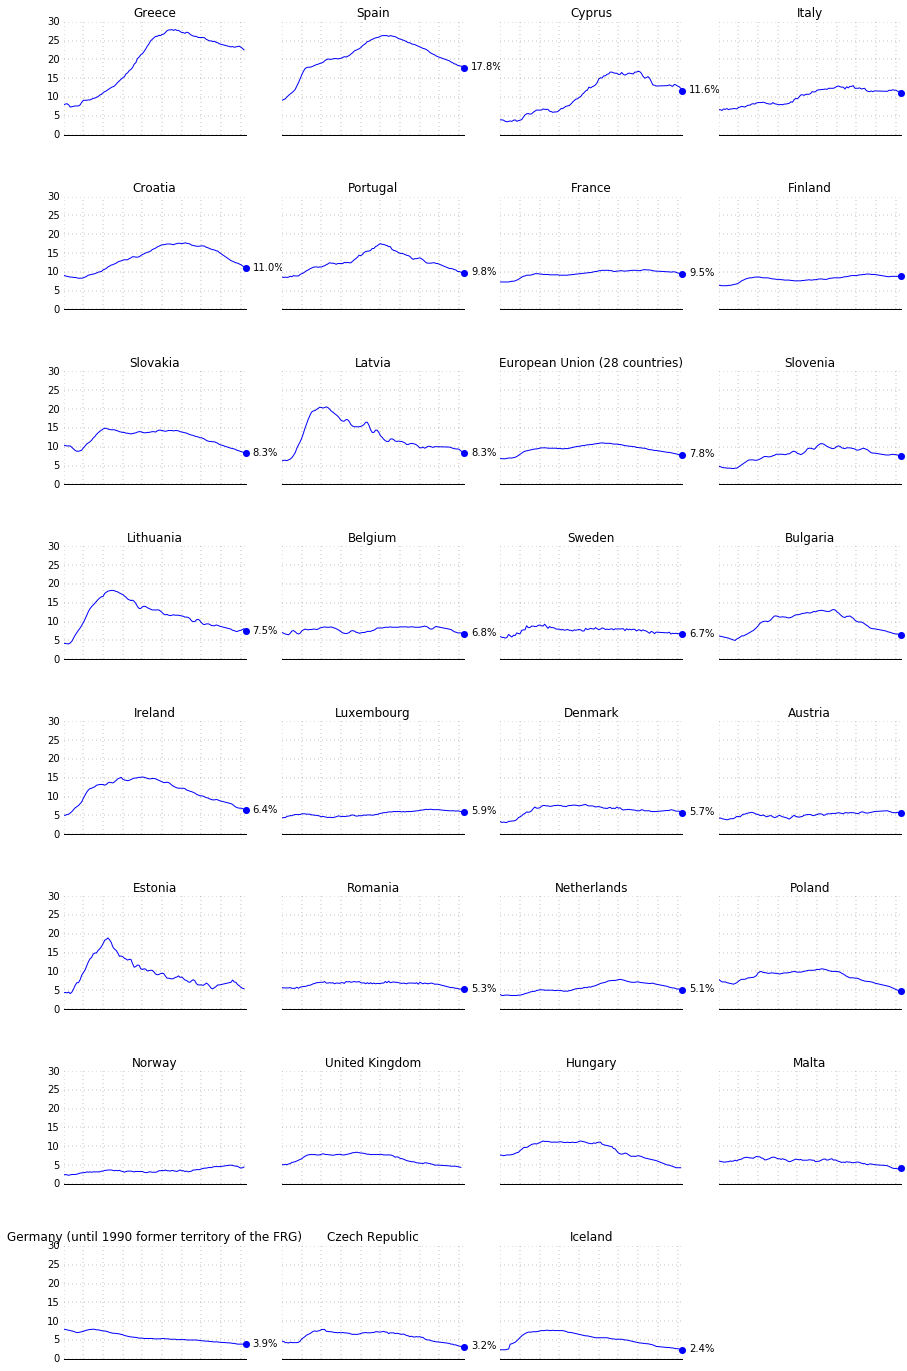

In [160]:
fig, axes = plt.subplots(nrows=9, ncols=4, sharex=True, sharey=True, figsize=(15,30))
axes_list = [item for sublist in axes for item in sublist]

grouped = df.groupby("GEO")
ordered_country_names = ['Greece', 'Spain', 'Cyprus', 'Italy', 'Croatia', 'Portugal',
       'France', 'Finland', 'Slovakia', 'Latvia',
       'European Union (28 countries)', 'Slovenia', 'Lithuania', 'Belgium',
       'Sweden', 'Bulgaria', 'Ireland', 'Luxembourg', 'Denmark', 'Austria',
       'Estonia', 'Romania', 'Netherlands', 'Poland', 'Norway',
       'United Kingdom', 'Hungary', 'Malta',
       'Germany (until 1990 former territory of the FRG)', 'Czech Republic', 'Iceland']

first_year = df['datetime'].min()
last_year = df['datetime'].max()

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)

    ax = axes_list.pop(0)
    selection.plot(x='datetime', y='Unemployment_rate', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.set_ylim(0,30)
    ax.set_xlim(first_year, last_year)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlabel("")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    max_year = selection['datetime'].max()
    unemployment_rate = float(selection[selection['datetime'] == max_year]['Unemployment_rate'])
    ax.scatter(x=[max_year], y=[unemployment_rate], s=50, clip_on=False, linewidth=0)
    ax.annotate(str(unemployment_rate) + "%", xy=[max_year, unemployment_rate], xytext=[7, -2], textcoords='offset points')


for ax in axes_list:
    ax.remove()
    
plt.subplots_adjust(hspace=0.55)    

# plt.savefig("QE_unemployment.pdf", Transparent=True)

In [168]:
df[df["GEO"]=="Ireland"]

,TIME,GEO,Unemployment_rate,parsed_time,datetime
7,2008M01,Ireland,5.0,2008-01-01,2008-01-01
41,2008M02,Ireland,5.0,2008-02-01,2008-02-01
75,2008M03,Ireland,5.2,2008-03-01,2008-03-01
109,2008M04,Ireland,5.3,2008-04-01,2008-04-01
143,2008M05,Ireland,5.6,2008-05-01,2008-05-01
177,2008M06,Ireland,6.0,2008-06-01,2008-06-01
211,2008M07,Ireland,6.5,2008-07-01,2008-07-01
245,2008M08,Ireland,7.0,2008-08-01,2008-08-01
279,2008M09,Ireland,7.3,2008-09-01,2008-09-01
313,2008M10,Ireland,7.6,2008-10-01,2008-10-01
